In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
data=pd.read_csv(r"./ipl/matches.csv")

In [3]:
data.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN


<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>
Data Cleaning</p><br>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 18 columns):
id                 577 non-null int64
season             577 non-null int64
city               570 non-null object
date               577 non-null object
team1              577 non-null object
team2              577 non-null object
toss_winner        577 non-null object
toss_decision      577 non-null object
result             577 non-null object
dl_applied         577 non-null int64
winner             574 non-null object
win_by_runs        577 non-null int64
win_by_wickets     577 non-null int64
player_of_match    574 non-null object
venue              577 non-null object
umpire1            577 non-null object
umpire2            577 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 81.2+ KB


In [5]:
before_rows = data.shape[0]
print(before_rows)

577


In [6]:
del data['umpire3']
data.dropna(inplace=True)

In [7]:
after_rows = data.shape[0]
print(after_rows)

567


In [8]:
data.isnull().any()

id                 False
season             False
city               False
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner             False
win_by_runs        False
win_by_wickets     False
player_of_match    False
venue              False
umpire1            False
umpire2            False
dtype: bool

In [9]:
data2008=data[data['season'] == 2008]
data2009=data[data['season'] == 2009]
data2010=data[data['season'] == 2010]
data2011=data[data['season'] == 2011]
data2012=data[data['season'] == 2012]
data2013=data[data['season'] == 2013]
data2014=data[data['season'] == 2014]
data2015=data[data['season'] == 2015]
data2016=data[data['season'] == 2016]

<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>
Analysis</p><br>

In [10]:
data2009.iloc[-1].winner

'Deccan Chargers'

In [11]:
data2010.iloc[-1].winner

'Chennai Super Kings'

In [12]:
data2011.iloc[-1].winner

'Chennai Super Kings'

In [13]:
data2012.iloc[-1].winner

'Kolkata Knight Riders'

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Percentage of Maximum Choosen Cities
</p>

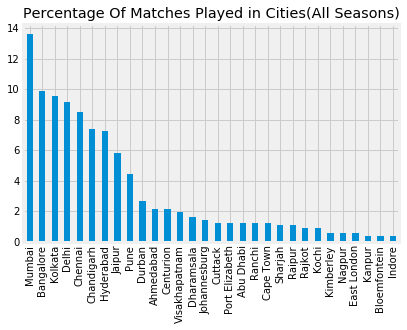

In [14]:

(data.city.value_counts(normalize=True) *100).plot(kind='bar',title='Percentage Of Matches Played in Cities(All Seasons)')

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Percentage of toss decisions
</p>

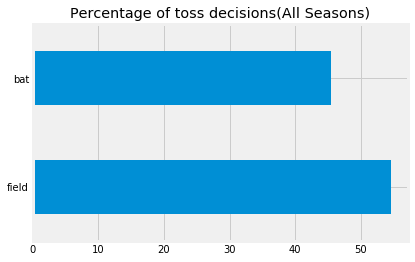

In [15]:
#Percentage of toss decisions
(data.toss_decision.value_counts(normalize=True)*100).plot(kind='barh',title='Percentage of toss decisions(All Seasons)')

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>
Maximum Man Of the Match
</p>

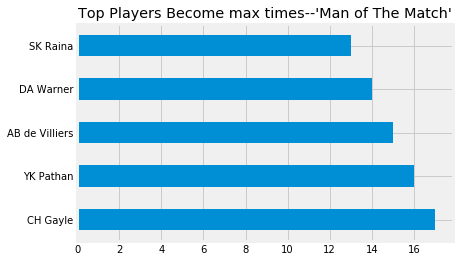

In [16]:
data.player_of_match.value_counts().head().plot(kind='barh',title="Top Players Become max times--\'Man of The Match'",grid=True) #No of the man of the match per player

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Favourite Venue
</p>

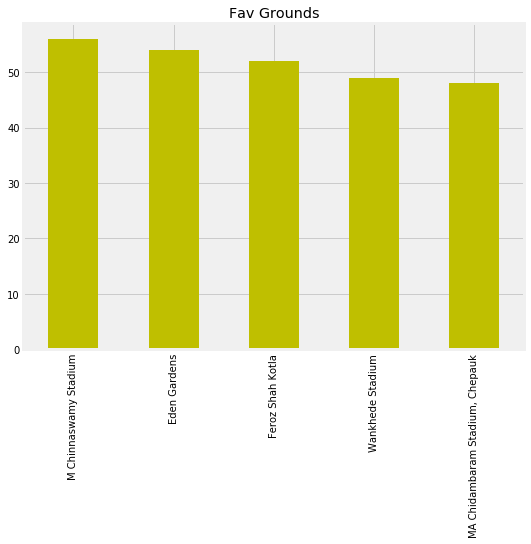

In [17]:
#Number of Maximum Choosen Venue
data.venue.value_counts().head().plot(kind='bar',title='Fav Grounds',figsize=(8,6),color="Y")

In [18]:
#Winning Percent of teams at Chinnaswamy Stadium
data[data.venue=='M Chinnaswamy Stadium']['winner'].value_counts(normalize=True)*100

Royal Challengers Bangalore    51.785714
Mumbai Indians                 10.714286
Kings XI Punjab                 7.142857
Chennai Super Kings             7.142857
Kolkata Knight Riders           7.142857
Delhi Daredevils                5.357143
Rajasthan Royals                5.357143
Sunrisers Hyderabad             3.571429
Deccan Chargers                 1.785714
Name: winner, dtype: float64

In [19]:
print data.win_by_runs.mean()  #Average win by runs
print data.win_by_wickets.mean()   #Average win by wicket

13.9118165785
3.38271604938


In [20]:
kkr=data[(data.team1=="Kolkata Knight Riders") |(data.team2=="Kolkata Knight Riders")]

In [21]:
#List of the cities in which the kkr played
list_of_cities=kkr.city.unique().tolist()

In [22]:
label={'Cities':{}}
for i in list_of_cities:
    b=kkr[kkr.city==i].count().tolist()[0]   #Gives the total matches played as count
    a=kkr[(kkr.city==i)&(kkr.winner=='Kolkata Knight Riders')].count().tolist()[0] #Matches in which kkr wins as count
    percentage=(float(a)/float(b))*100    #To calculate winning percentage with respect to the cities
    label['Cities'][i]=percentage


In [23]:
#Expressing in form of DataFrame
x=pd.DataFrame(label)

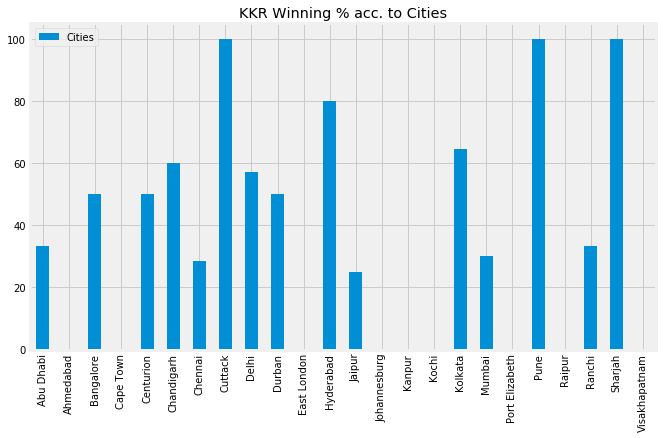

In [24]:
x.plot(kind='bar',title='KKR Winning % acc. to Cities',figsize=(10,6))

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Winning w.r.t toss decisions
</p>

In [25]:
pd.crosstab(data2008.winner,data2008.toss_decision)

toss_decision,bat,field
winner,,
Chennai Super Kings,6,3
Deccan Chargers,0,2
Delhi Daredevils,3,4
Kings XI Punjab,4,6
Kolkata Knight Riders,5,1
Mumbai Indians,1,6
Rajasthan Royals,4,9
Royal Challengers Bangalore,3,1


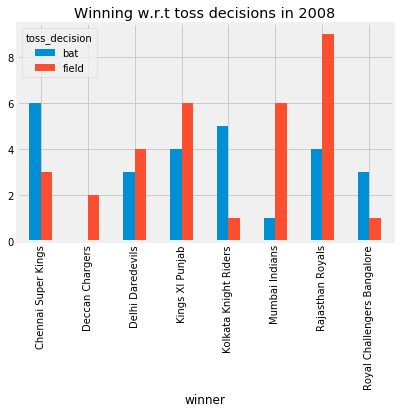

In [26]:
pd.crosstab(data2008.winner,data2008.toss_decision).plot(kind='bar',title='Winning w.r.t toss decisions in 2008')

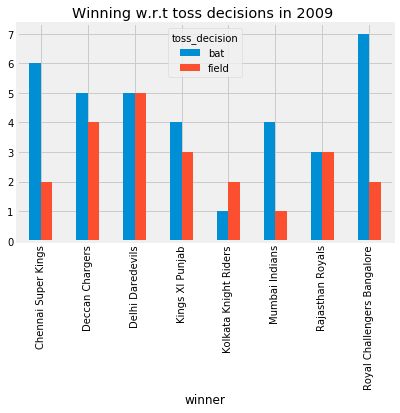

In [27]:
pd.crosstab(data2009.winner,data2009.toss_decision).plot(kind='bar',title='Winning w.r.t toss decisions in 2009 ')

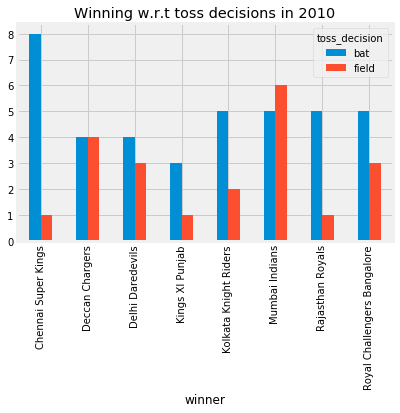

In [28]:
pd.crosstab(data2010.winner,data2010.toss_decision).plot(kind='bar',title='Winning w.r.t toss decisions in 2010')

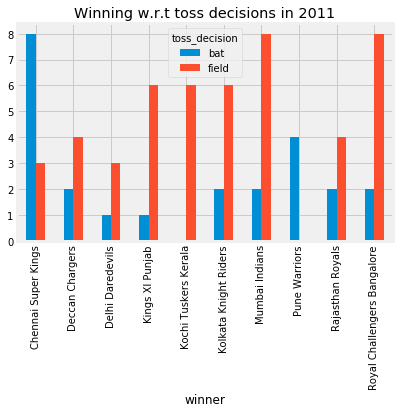

In [29]:
pd.crosstab(data2011.winner,data2011.toss_decision).plot(kind='bar',title='Winning w.r.t toss decisions in 2011')

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Winning w.r.t Cities
</p>

In [30]:

pd.crosstab(data2008.winner,data2008.city)

city,Bangalore,Chandigarh,Chennai,Delhi,Hyderabad,Jaipur,Kolkata,Mumbai
winner,,,,,,,,
Chennai Super Kings,1,1,3,1,1,0,1,1
Deccan Chargers,0,0,1,0,0,0,0,1
Delhi Daredevils,1,0,1,4,1,0,0,0
Kings XI Punjab,1,6,0,1,1,0,0,1
Kolkata Knight Riders,1,0,0,0,1,0,4,0
Mumbai Indians,1,0,0,0,1,0,1,4
Rajasthan Royals,1,0,1,0,1,7,1,2
Royal Challengers Bangalore,1,0,1,0,1,0,0,1


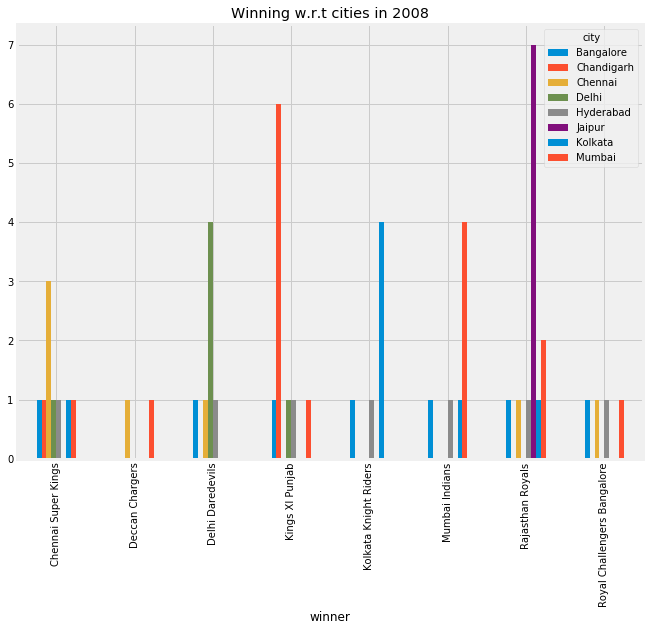

In [31]:
pd.crosstab(data2008.winner,data2008.city).plot(kind='bar',title='Winning w.r.t cities in 2008',figsize=(10,8))

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Favourite Umpires
</p>

In [32]:
fav_umpire=data.umpire1.value_counts().head(10)

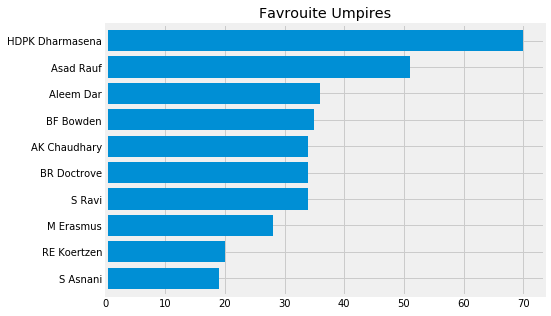

In [33]:
fav_umpire.sort_values(ascending=True).plot(kind='barh',title='Favrouite Umpires',figsize=(7,5),width=0.8)

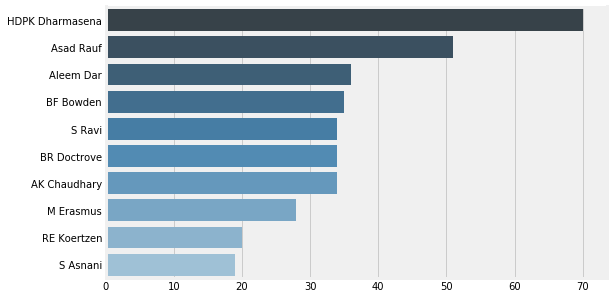

In [34]:
#From Seaborn
plt.subplots(figsize=(8,5))
sns.barplot(x=fav_umpire.values,y=fav_umpire.index,palette="Blues_d")

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Maximum Toss Winners
</p>

In [35]:
data.toss_winner.value_counts()

Mumbai Indians                 72
Kolkata Knight Riders          68
Chennai Super Kings            66
Kings XI Punjab                63
Delhi Daredevils               63
Rajasthan Royals               61
Royal Challengers Bangalore    59
Deccan Chargers                43
Sunrisers Hyderabad            29
Pune Warriors                  20
Kochi Tuskers Kerala            8
Gujarat Lions                   8
Rising Pune Supergiants         7
Name: toss_winner, dtype: int64

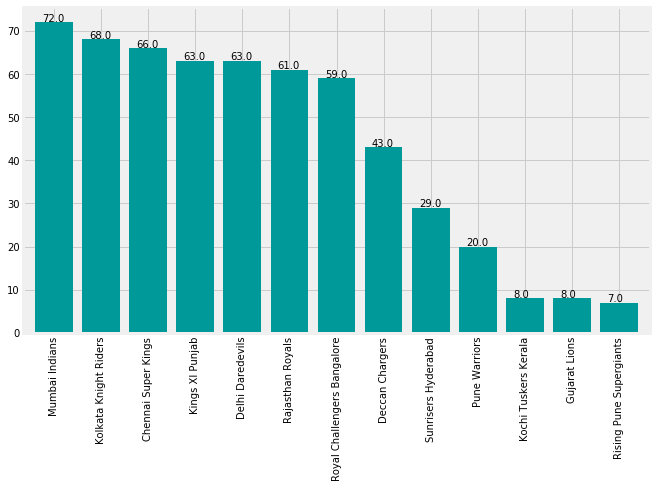

In [36]:
plt.subplots(figsize=(10,6))
ax=data.toss_winner.value_counts().plot(kind='bar',width=0.8,color='#009999')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

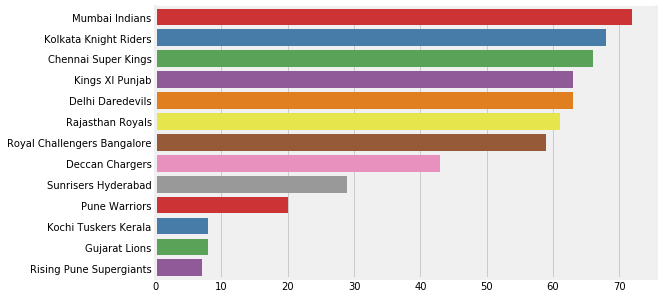

In [37]:
#By Seaborn
plt.subplots(figsize=(8,5))
sns.barplot(x=data.toss_winner.value_counts().values,y=data.toss_winner.value_counts().index,palette="Set1")

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Matches Played v/s Matches Win
</p>

In [38]:
teams=data.team1.value_counts().index.tolist()

In [39]:
total_matches=[]
matches_win=[]
for i in teams:
    total_matches.append(data[(data['team1']==i)|(data['team2']==i)].shape[0])
    matches_win.append(data[((data['team1']==i)|(data['team2']==i))& (data.winner==i)].shape[0])
    

In [40]:
match_win={'Matches Played':total_matches,'Matches Win':matches_win}

In [41]:
match_win=pd.DataFrame(data=match_win,index=teams)

In [42]:
match_win

,Matches Played,Matches Win
Chennai Super Kings,129,77
Mumbai Indians,137,80
Kings XI Punjab,133,62
Kolkata Knight Riders,131,68
Royal Challengers Bangalore,135,69
Delhi Daredevils,129,55
Rajasthan Royals,116,63
Deccan Chargers,75,29
Sunrisers Hyderabad,60,32
Pune Warriors,45,12


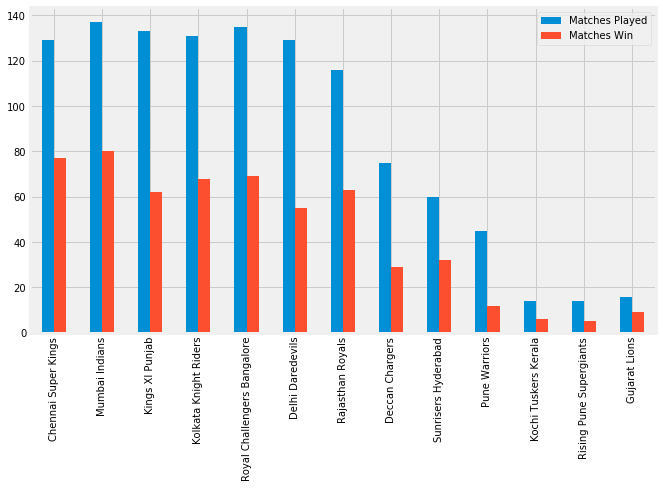

In [43]:
match_win.plot(kind='bar',figsize=(10,6))